<a href="https://colab.research.google.com/github/siwarbenfekhta/tp1_ML/blob/master/TPRN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1- Créer Un DataFrame en utilisant les données de fichier ‘’Iris.csv” qui
contient notre dataSet.

In [2]:
import pandas as pd
import requests
from io import StringIO
url = "https://drive.google.com/file/d/1lCrldn-uT1K6ctUC2xt7-hMjbMZ9Ft9r/view?usp=sharing"
file_id = url.split('/')[-2]
dwn_url='https://drive.google.com/uc?export=download&id=' + file_id
url2 = requests.get(dwn_url).text
csv_raw = StringIO(url2)
dataset = pd.read_csv(csv_raw)


2-Afficher les 10 premières lignes du DataFrame.

In [3]:
dataset.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


3-Afficher les dimensions du dataframe.

In [4]:
dataset.shape

(150, 6)

4-Utiliser la bibliothèque python Seaborn pour visualiser les données en
fonction de la longueur des pétales et de largeur des sépales.



In [5]:
import seaborn as sns

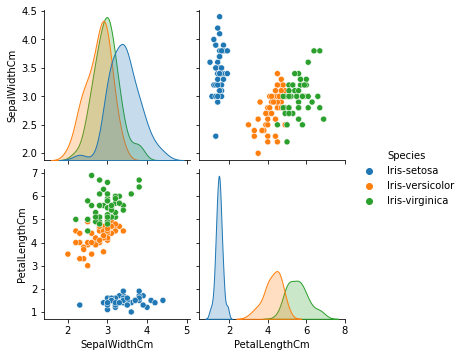

In [6]:
sns.pairplot(data=dataset, vars=( 'SepalWidthCm' , 'PetalLengthCm') ,hue="Species")

5-Ecrire un script python permettant de labelliser les différentes espèces
d’iris.( Iris_Setosa → 0 , Iris_Versicolor→ 1 et Iris_Virginica → 2 )

In [7]:
data = dataset[['Species']].replace(['Iris-setosa' , 'Iris-versicolor' , 'Iris-virginica'] , [0,1,2])
data.sample(n=5)

,Species
98,1
145,2
50,1
135,2
84,1


6-Afficher du nouveau les 10 premières lignes du nouveau DataFrame
contenant les labels.

In [8]:
data.head(10)

,Species
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [9]:
new_df = dataset[['SepalLengthCm' , 'SepalWidthCm' , 'PetalLengthCm' , 'PetalWidthCm']] 
new_df = pd.concat([new_df , data] , axis=1)

In [10]:
new_df.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


7-Écrire un script python permettant la division de dataset en des données
d’apprentissage (70%) et des données de test (30%).

In [11]:
from sklearn import model_selection

In [12]:
train,test = model_selection.train_test_split(new_df , test_size=0.3)
train_x = train[['SepalLengthCm' , 'SepalWidthCm' , 'PetalLengthCm' , 'PetalWidthCm']] 
train_y = train.Species
test_x = test[['SepalLengthCm' , 'SepalWidthCm' , 'PetalLengthCm' , 'PetalWidthCm']] 
test_y = test.Species

8-Afficher les 10 premières données d’apprentissage et celles de test.

In [13]:
train_x.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
100,6.3,3.3,6.0,2.5
83,6.0,2.7,5.1,1.6
105,7.6,3.0,6.6,2.1
113,5.7,2.5,5.0,2.0
143,6.8,3.2,5.9,2.3
13,4.3,3.0,1.1,0.1
60,5.0,2.0,3.5,1.0
39,5.1,3.4,1.5,0.2
93,5.0,2.3,3.3,1.0
22,4.6,3.6,1.0,0.2


In [14]:
train_y.head(10)

100    2
83     1
105    2
113    2
143    2
13     0
60     1
39     0
93     1
22     0
Name: Species, dtype: int64

In [15]:
test_x.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
80,5.5,2.4,3.8,1.1
55,5.7,2.8,4.5,1.3
133,6.3,2.8,5.1,1.5
75,6.6,3.0,4.4,1.4
51,6.4,3.2,4.5,1.5
56,6.3,3.3,4.7,1.6
44,5.1,3.8,1.9,0.4
99,5.7,2.8,4.1,1.3
112,6.8,3.0,5.5,2.1
11,4.8,3.4,1.6,0.2


In [65]:
test_y.head(10)

80     1
55     1
133    2
75     1
51     1
56     1
44     0
99     1
112    2
11     0
Name: Species, dtype: int64

9-Ecrire un script python qui utilise un perceptron multicouche pour
l’apprentissage des données avec un optimisateur (‘lbfgs’, epsilon=0.07 et
nombre maximum d’itération=150) .

In [17]:
from sklearn.neural_network import MLPClassifier

In [18]:
%%time
clf =  MLPClassifier(solver='lbfgs',alpha=1e-5,hidden_layer_sizes=(3,3), epsilon=0.07 , max_iter = 150)

CPU times: user 53 µs, sys: 0 ns, total: 53 µs
Wall time: 60.8 µs


In [19]:
%%time
clf.fit(train_x , train_y)

CPU times: user 165 ms, sys: 0 ns, total: 165 ms
Wall time: 169 ms


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(alpha=1e-05, epsilon=0.07, hidden_layer_sizes=(3, 3),
              max_iter=150, solver='lbfgs')

10-Evaluer ce perceptron en affichant son “accuracy” et le temps de réponse.

In [20]:
from sklearn import metrics
prediction = clf.predict(test_x)
print(prediction)
print(test_y.values)
print('Accuracy:',metrics.accuracy_score(prediction,test_y))

[1 1 1 1 1 1 0 1 2 0 0 2 2 1 0 2 1 2 2 2 0 2 1 0 1 2 2 2 1 0 1 0 1 2 2 0 2
 0 2 1 0 2 0 2 1]
[1 1 2 1 1 1 0 1 2 0 0 2 2 1 0 2 1 2 2 2 0 2 1 0 1 2 2 2 1 0 1 0 1 1 2 0 2
 0 2 1 0 2 0 2 1]
Accuracy: 0.9555555555555556


In [21]:
import matplotlib.pyplot as plt

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


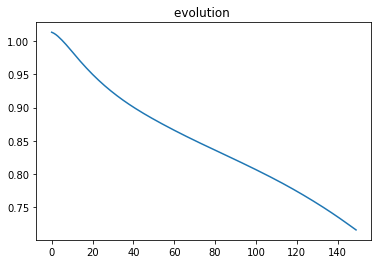

CPU times: user 204 ms, sys: 964 µs, total: 205 ms
Wall time: 204 ms


In [22]:
%%time
mlp = MLPClassifier(solver='sgd', alpha=1e-5, hidden_layer_sizes=(3, 3), epsilon=0.07, max_iter=150)
mlp.fit(train_x, train_y)
plt.plot(mlp.loss_curve_)
plt.title('evolution ')
plt.show()

In [23]:
prediction = clf.predict(test_x)
prediction

array([1, 1, 1, 1, 1, 1, 0, 1, 2, 0, 0, 2, 2, 1, 0, 2, 1, 2, 2, 2, 0, 2,
       1, 0, 1, 2, 2, 2, 1, 0, 1, 0, 1, 2, 2, 0, 2, 0, 2, 1, 0, 2, 0, 2,
       1])

In [24]:
test_y.values

array([1, 1, 2, 1, 1, 1, 0, 1, 2, 0, 0, 2, 2, 1, 0, 2, 1, 2, 2, 2, 0, 2,
       1, 0, 1, 2, 2, 2, 1, 0, 1, 0, 1, 1, 2, 0, 2, 0, 2, 1, 0, 2, 0, 2,
       1])

In [25]:
from sklearn.metrics import accuracy_score

In [26]:
accuracy = accuracy_score(prediction,test_y)
accuracy

0.9555555555555556

11-Afficher la matrice de confusion associée à notre cas.

In [27]:
!pip install pretty-confusion-matrix

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.4 MB 32.4 MB/s 
     |████████████████████████████████| 156 kB 70.6 MB/s 
     |████████████████████████████████| 73 kB 1.5 MB/s 
     |████████████████████████████████| 103 kB 83.6 MB/s 
     |████████████████████████████████| 199 kB 69.0 MB/s 
     |████████████████████████████████| 41 kB 599 kB/s 
     |████████████████████████████████| 68 kB 7.0 MB/s 
     |████████████████████████████████| 295 kB 81.4 MB/s 
     |████████████████████████████████| 965 kB 68.1 MB/s 
     |████████████████████████████████| 8.8 MB 47.8 MB/s 
     |████████████████████████████████| 98 kB 8.4 MB/s 
     |████████████████████████████████| 468 kB 57.3 MB/s 
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=e8cf030491e9781f91422167e4afbb98881ee34281df80a73aaa25275a0571a9
  Stored in directory: /root/.cache/pip/wheels/14/25/f7/1c

/usr/local/lib/python3.8/dist-packages/pretty_confusion_matrix/pretty_confusion_matrix.py:200: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
  t.tick1On = False
/usr/local/lib/python3.8/dist-packages/pretty_confusion_matrix/pretty_confusion_matrix.py:201: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.
  t.tick2On = False
/usr/local/lib/python3.8/dist-packages/pretty_confusion_matrix/pretty_confusion_matrix.py:203: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
  t.tick1On = False
/usr/local/lib/python3.8/dist-packages/pretty_confusion_matrix/pretty_confusion_matrix.py:204: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be remo

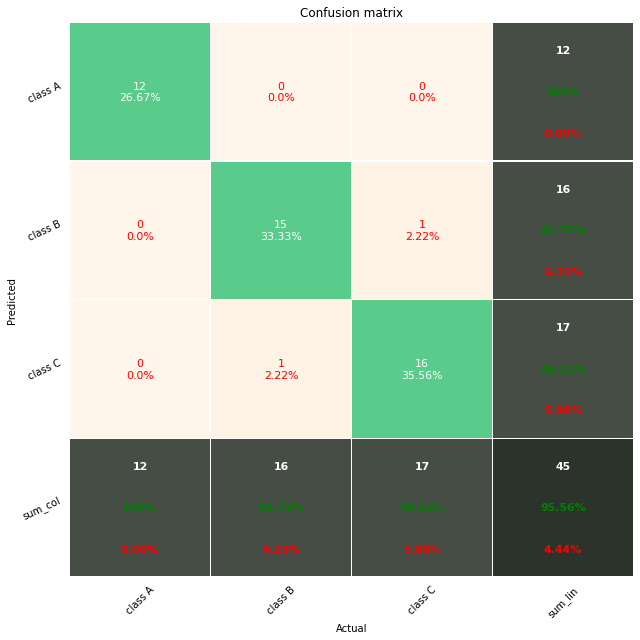

In [28]:
import numpy as np
from pretty_confusion_matrix import pp_matrix_from_data
cmap = 'PuRd'
pp_matrix_from_data(test_y, prediction)

12-Selon les résultats affichés commenter le perceptron que vous avez utilisé.

La matrice de confusion est en quelque sorte un résumé des résultats de prédiction, elle compare les données réelles pour une variable cible à celles prédites par un modèle. Dans notre cas, pour la première ligne, il y’a 16 valeurs de la classe A ont été prédites correctement puisque nous avons trouvé que 16 zéros dans test_x et dans la prédiction nous avons obtenus 16 zéros aussi. Concernant la classe B, nous avons en total 29 valeurs de 1 , parmi lesquelles il y’a 16 valeurs ont été prédites incorrectement au lieu de 1 ont été prédites 2 (comme étant appartenant à la classe C).
Nous pouvons conclure que notre perceptron est performant

13-On va ajouter le paramètre de taux d’apprentissage au niveau de
classifieur utilisé pour une valeur égale 0.7

In [33]:
classifier = MLPClassifier(hidden_layer_sizes=(3,3),solver='sgd',learning_rate_init=0.7,max_iter=150)

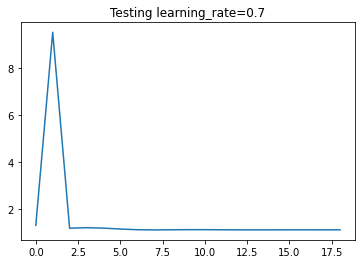

In [34]:
classifier.fit(train_x, train_y)
plt.plot(classifier.loss_curve_)
plt.title('Testing learning_rate=0.7')
plt.show()

14-Nous allons étudier la variation du paramètre de taux d’apprentissage,
donc nous allons afficher la courbe d'évolution d’apprentissage et celle de test
en fonction de variation du taux d’apprentissage.

In [46]:
params= [
    {
        "solver":"sgd",
        "learning_rate":"constant",
        "learning_rate_init":0.2,
        "max_iter":150,
    },
      {
        "solver":"sgd",
        "learning_rate":"constant",
        "learning_rate_init":0.7,
        "max_iter":300,
    },
  {
        "solver":"sgd",
        "learning_rate":"invscaling",
        "learning_rate_init":0.2,
        "max_iter":300,
    },
      {
        "solver":"sgd",
        "learning_rate":"invscaling",
        "learning_rate_init":0.7,
        "max_iter":150,
    },{
       "solver" :"adam",
       "learning_rate_init":0.01,
      "max_iter":300,

    },
]
labels= [
    "Testing 1 : constant learning_rate = 0.2",
    "Testing 2 : constant learning_rate = 0.7",
    "Testing 3 : invscaling learning_rate = 0.2",
    "Testing 4 : invscaling learning_rate = 0.7",

]
plot_args = [
    {"c":"red","linestyle":"-"},
    {"c":"green","linestyle":"-"},
    {"c":"blue","linestyle":"-"},
    {"c":"red","linestyle":"--"},
    {"c":"green","linestyle":"--"},
]


In [47]:
mlps = []
for label, param in zip(labels,params):
  print('training is : %s' %label)
  mlp = MLPClassifier(random_state=0 , **param)
  mlp.fit(test_x , test_y)
  mlps.append(mlp)
  print("training set score : %f" %mlp.score(test_x , test_y))

training : Testing 1 : constant learning_rate = 0.2
training set score : 0.266667
training : Testing 2 : constant learning_rate = 0.7
training set score : 0.377778
training : Testing 3 : invscaling learning_rate = 0.2
training set score : 0.977778
training : Testing 4 : invscaling learning_rate = 0.7
training set score : 0.977778


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


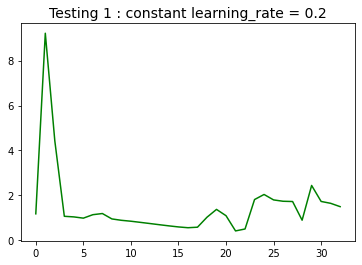

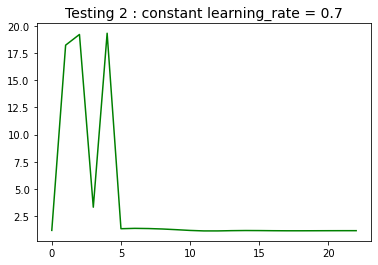

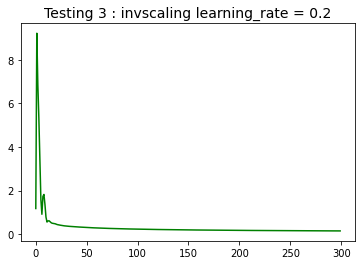

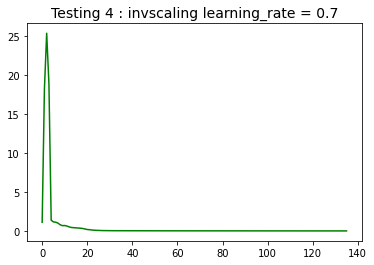

In [61]:
#print results after tuning hyperparameters

for mlp, label, args in zip(mlps,labels,plot_args):
  plt.plot(mlp.loss_curve_ , 'g', label=label)
  plt.title(label,fontsize=14)
  plt.show()

15-Nous allons fixer un nombre d’itération égale à 10 fois le nombre fixé au
début. Quel est le phénomène constaté ? et comment pouvons- nous
surmonter celui-ci ?

In [ ]:
cl =  MLPClassifier(solver='sgd',alpha=1e-5,hidden_layer_sizes=(3,3), epsilon=0.07 , max_iter = 1500)

In [ ]:
cl.fit(train_x, train_y)


MLPClassifier(alpha=1e-05, epsilon=0.07, hidden_layer_sizes=(3, 3),
              max_iter=1500, solver='sgd')

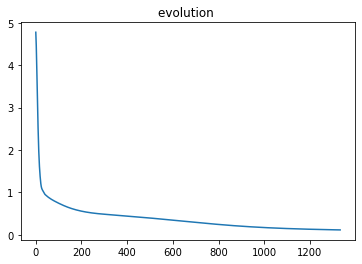

In [ ]:
plt.plot(cl.loss_curve_)
plt.title('evolution ')
plt.show()

**Constatation :** En augmentant le nombre d'itérations nous constatons les performances du modèle sur les données d'entrainement s'améliorent tandis que celles sur les données de test diminuent, cela indique un surapprentissage.Donc le modèle prédira mal sur des données qu’il n’a pas encore vues lors de sa phase d’apprentissage.
Pour éviter ce problème, on peut procéder à ne pas entraîner le modèle trop longtemps et notamment d’être très attentif au moment où les performances sur jeu d’entraînement et les performances sur jeu de test se croisent ou à ajouter des données d’entraînements ou à ajuster les hyperparamétres


16-Tester d’autres classifieurs de type réseau de neurones
(Dynamique/Récurrent et Non récurrent) .

**Réponse** : Les réseaux de neurones récurrents (RNN) sont une classe de réseaux de neurones puissants pour modéliser des données de séquence telles que des séries chronologiques ou le langage naturel.

In [63]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Activation, Dense,SimpleRNN

In [64]:
model = keras.Sequential()
model.add(Dense(len(train_x.columns),input_shape=(len(train_x.columns),),activation='relu'))
model.add(Dense(1,activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model = model.fit(train_x, train_y)

model

4/4 [==============================] - 1s 6ms/step - loss: 0.0000e+00 - accuracy: 0.3238


In [ ]:
new_model = keras.Sequential()
new_model.add(SimpleRNN(len(train_x.columns),return_sequences=True, return_state=True))
new_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
new_model

17-Dans notre cas de base de donnée Iris, est ce qu’il est intéressant d’avoir
un réseau de neurones récurrent ou non ? justifier vos réponses.

Les réseaux de neurones récurrents utilisent les sorties précédentes comme entrées supplémentaires et sont parfaitement adaptés au traitement de données séquentielles tel que le langage naturel donc pour le cas de la classification de la base de données Iris, on n'a pas vraiment interet à utiliser les réseaux de neurones récurrents.